In [28]:
import os
import torch
import rioxarray
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt

from super_image import HanModel

srmodel = HanModel.from_pretrained('eugenesiow/han', scale=4)
srmodel.eval()

/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/file_download.py:680: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'url_to_filename' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` to benefit from the new cache layout.
  warnings.warn(warning_message, FutureWarning)


https://huggingface.co/eugenesiow/han/resolve/main/pytorch_model_4x.pt


HanModel(
  (sub_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (add_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (head): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (body): Sequential(
    (0): ResidualGroup(
      (body): Sequential(
        (0): RCAB(
          (body): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): ReLU(inplace=True)
            (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): CALayer(
              (avg_pool): AdaptiveAvgPool2d(output_size=1)
              (conv_du): Sequential(
                (0): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
                (1): ReLU(inplace=True)
                (2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1))
                (3): Sigmoid()
              )
            )
          )
        )
        (1): RCAB(
          (body): Sequential(
   

In [1]:
import os
import torch
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

from super_image import HanModel

In [2]:
srmodel = HanModel.from_pretrained("/home/tidop/Desktop/projects/roadeye/docker/vhr_fastapi/src/weights/han", scale=4)
srmodel.eval()

/home/tidop/Desktop/projects/roadeye/docker/vhr_fastapi/src/weights/han/pytorch_model_4x.pt


In [37]:
import os
import torch
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

from super_image import HanModel

srmodel = HanModel.from_pretrained('eugenesiow/han', scale=4)
srmodel.eval()

def make_superimage(in_path, out_path_np, out_path_img):
    # Load the image
    # image = rio.open(in_path).read().squeeze()

    image = rioxarray.open_rasterio(in_path).squeeze().to_numpy()

    image = image[0:3] / 10000
    image_torch = torch.from_numpy(image).float()

    with torch.no_grad():
        sr_img = srmodel(image_torch[None]).squeeze().numpy()
    
    # Save the super-resolved image as numpy array
    np.save(out_path_np, sr_img)

    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    ax[0].imshow(np.moveaxis(image, 0, -1)*2.5)
    # ax[0].set_title('Low Resolution')
    ax[1].imshow(np.moveaxis(sr_img, 0, -1)*2.5)
    # ax[1].set_title('Super Resolved')
    
    for a in ax:
        a.axis('off')
    plt.tight_layout()
    # Save the figure
    # plt.show()
    plt.savefig(out_path_img)

/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)
/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/file_download.py:680: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/home/tidop/miniconda3/envs/fastapi/lib/python3.10/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'url_to_filename' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` to benefit from the new cache layout.
  warnings.warn(warning_message, FutureWarning)


https://huggingface.co/eugenesiow/han/resolve/main/pytorch_model_4x.pt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2905..1.8479999999999999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16564846..1.9333985].


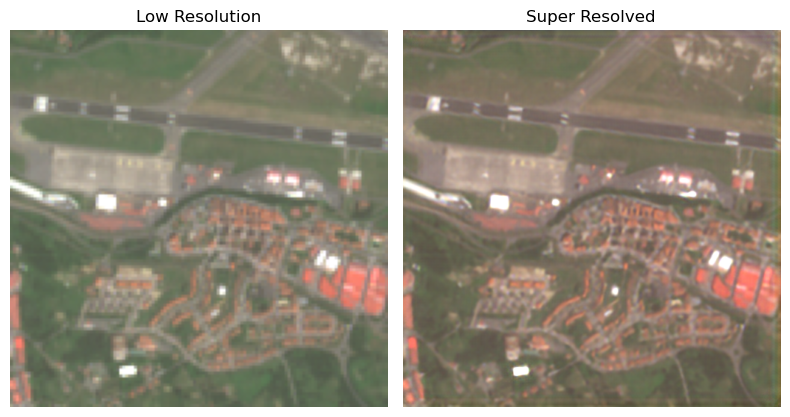

In [38]:
in_path = "../data/input/00036.tif"
out_path_np = "../data/out_superimage/00036_1.npy"
out_path_img = "../data/out_superimage/00036_1.png"

make_superimage(in_path, out_path_np, out_path_img)